# Data Challenge


## Setting up the notebook


In [3]:
# Import der erforderlichen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from datetime import datetime, timedelta
import chardet
from math import ceil




## Laden und Bereinigen der Daten


In [5]:
# Laden der Daten 
piano_df = pd.read_csv("data/piano_data.csv", delimiter = ";")

In [6]:
# Check des Dataframes
piano_df.head()

,Verkaufsauftrag,SubscriptionStart,SubscriptionEnde,Standort,Druckerzeugnisgruppe,Payment Provider,Testabo,Kampagnentext
0,1,02.07.21,31.12.99,B,BM,Paypal,FALSCH,Sommerkampagne
1,2,02.06.20,31.12.99,NRW,NRZ,Paypal,FALSCH,Sommerkampagne
2,3,29.10.20,29.11.20,HH,HA,Paypal,FALSCH,Herbstkampagne
3,4,27.06.20,27.09.20,NRW,WAZ,Paypal,FALSCH,Sommerkampagne
4,5,30.06.20,27.09.20,NRW,WAZ,Paypal,FALSCH,Sommerkampagne


In [7]:
# Check Anzahl Spalten und Zeilen 
piano_df.shape

(170212, 8)

In [8]:
# Check der Datatypes
piano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170212 entries, 0 to 170211
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Verkaufsauftrag       170212 non-null  int64 
 1   SubscriptionStart     170212 non-null  object
 2   SubscriptionEnde      170212 non-null  object
 3   Standort              170212 non-null  object
 4   Druckerzeugnisgruppe  170212 non-null  object
 5   Payment Provider      170212 non-null  object
 6   Testabo               170212 non-null  object
 7   Kampagnentext         170212 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.4+ MB


In [9]:
# Spaltennamen in Kleinbuchstaben darstellen
piano_df.columns = piano_df.columns.str.lower()  

In [10]:
# Leerzeichen austauschen    
piano_df.columns = piano_df.columns.str.replace(' ', '_')


In [11]:
# Check Spaltennamen
piano_df.columns

Index(['verkaufsauftrag', 'subscriptionstart', 'subscriptionende', 'standort',
       'druckerzeugnisgruppe', 'payment_provider', 'testabo', 'kampagnentext'],
      dtype='object')

In [12]:
# Namensänderung der Kolumen um Leerzeichen loszuwerden und die Namen für eine einfachere Anwendung zu kürzen
piano_df = piano_df.rename(columns={'Verkaufsauftrag': 'vertragsnummer', 'subscriptionstart': 'start', 'subscriptionende': 'ende', 'druckerzeugnisgruppe' : 'portal', 'payment provider' : 'payment', 'kampagnentext' : 'kampagne'})

In [13]:
# Konvertieren der Spalten 'Start' und 'Ende' in den Datentyp datetime
piano_df['ende'] = pd.to_datetime(piano_df['ende'], dayfirst=True)
piano_df['start'] = pd.to_datetime(piano_df['start'], dayfirst=True)

In [14]:
# das Datum für laufende Kampagnen auf den Stichtag setzen, um besser rechnen zu können 
piano_df['ende'].replace('1999-12-31', '2022-01-01', inplace=True)

In [15]:
#def add_year(df):
# piano_df['year'] = (piano_df['start']).dt.year


In [16]:
# Einträge in der Spalte 'Kampagne' spezifizieren
piano_df['kampagne'] = np.where((piano_df['start'] >= '2020-01-01') & (piano_df['start'] <= '2020-02-29'), 'Jahresstart_20', 
                            np.where((piano_df['start'] >= '2020-03-01') & (piano_df['start'] <= '2020-05-31'), 'Frühlingskampagne_20',
                            np.where((piano_df['start'] >= '2020-06-01') & (piano_df['start'] <= '2020-08-31'), 'Sommerkampagne_20',
                            np.where((piano_df['start'] >= '2020-09-01') & (piano_df['start'] <= '2020-11-30'), 'Herbstkampagne_20',
                            np.where((piano_df['start'] >= '2020-12-01') & (piano_df['start'] <= '2021-02-28'), 'Winterkampagne_20',
                            np.where((piano_df['start'] >= '2021-03-01') & (piano_df['start'] <= '2021-04-30'), 'Frühlingskampagne_21',
                            np.where((piano_df['start'] >= '2021-05-01') & (piano_df['start'] <= '2021-09-30'), 'Sommerkampagne_21',
                            np.where((piano_df['start'] >= '2021-10-01') & (piano_df['start'] <= '2021-11-21'), 'Winterkampagne_21',
                            np.where((piano_df['start'] >= '2021-11-22') & (piano_df['start'] <= '2021-11-29'), 'Cyber Week_21', 0)))))))))

In [17]:
# Berechnung der Laufzeit der einzelnen Abonnements
piano_df['haltbarkeit'] = (piano_df['ende'] - piano_df['start']).dt.days

In [18]:
# Anzahl der Werte in der Spalte 'Haltbarkeit', die unter Null liegen
count = piano_df[piano_df['haltbarkeit'] < 0].count()
print(count)

verkaufsauftrag     962
start               962
ende                962
standort            962
portal              962
payment_provider    962
testabo             962
kampagne            962
haltbarkeit         962
dtype: int64


In [19]:
piano_df[piano_df['haltbarkeit'] < 0]

,verkaufsauftrag,start,ende,standort,portal,payment_provider,testabo,kampagne,haltbarkeit
105,106,2020-06-20,2020-06-17,TH,TA,Visa,WAHR,Sommerkampagne_20,-3
379,380,2021-01-16,2021-01-13,NRW,WR,Paypal,WAHR,Winterkampagne_20,-3
528,529,2020-10-16,2020-10-13,NRW,WAZ,Paypal,FALSCH,Herbstkampagne_20,-3
625,626,2021-06-03,2021-05-31,NRW,WP,MasterCard,WAHR,Sommerkampagne_21,-3
699,700,2020-01-23,2020-01-21,HH,HA,Paypal,FALSCH,Jahresstart_20,-2
...,...,...,...,...,...,...,...,...,...
168945,168946,2021-01-23,2021-01-21,NRW,NRZ,MasterCard,WAHR,Winterkampagne_20,-2
169220,169221,2021-06-10,2021-06-07,NRW,WP,Paypal,WAHR,Sommerkampagne_21,-3
169498,169499,2021-01-16,2021-01-13,NRW,NRZ,Paypal,WAHR,Winterkampagne_20,-3
169776,169777,2021-01-18,2021-01-17,NRW,WAZ,MasterCard,WAHR,Winterkampagne_20,-1


In [20]:
# Entfernung von Laufzeiten unter null Tagen, hier scheint ein Fehler in den Daten vorzuliegen - 962- Einträge gelöscht. 
# Es wird davon ausgegangen, dass eine Laufzeit von 0 kein Fehler ist.
piano_df = piano_df[piano_df['haltbarkeit'] >= 0]

In [21]:
piano_df.shape

(169250, 9)

## Aufgabe 1: Überblick über die Bestandsentwicklung an Plus-Abonnements über die letzten zwei Jahre –  pro Standort.

In [22]:
# Liste der Ortsnamen 
unique_values = piano_df['standort'].unique()
print(unique_values)


['B' 'NRW' 'HH' 'BS' 'TH']


In [23]:
# Funktion, um den Bestand an Abonnements am jeweiligen Enddatum einer Kampagne, je Standort zu ermitteln
def get_number_of_abos(df):
    result_df = pd.DataFrame()
    for reference_date_str in ['2020-02-29', '2020-05-31', '2020-08-31', '2020-11-30', '2021-02-28', '2021-04-30', '2021-09-30', '2021-11-21', '2021-11-29']:
        reference_date = pd.to_datetime(reference_date_str)
        for location_name in df["standort"].unique():
            selection_df = df[df["standort"] == location_name]
            selection_df = selection_df[(selection_df["start"] <= reference_date) &
                                        (selection_df["ende"] >= reference_date)]
            n_abos = len(selection_df.index)
            result_df = result_df.append({'reference_day': reference_date,
                                          "standort": location_name,
                                          "n_abos": n_abos}, ignore_index=True)
    return result_df

In [ ]:
# Das Ergebnis einem neuen Dataframes zu ordnen 
bestand_df= get_number_of_abos(piano_df)

In [25]:
bestand_df.tail(20)

,reference_day,standort,n_abos
25,2021-04-30,B,1313
26,2021-04-30,NRW,20215
27,2021-04-30,HH,10276
28,2021-04-30,BS,2163
29,2021-04-30,TH,5817
30,2021-09-30,B,2037
31,2021-09-30,NRW,23760
32,2021-09-30,HH,11717
33,2021-09-30,BS,3168
34,2021-09-30,TH,7298


In [75]:
bestand_all_df = bestand_df.groupby(['reference_day'])['n_abos'].sum().reset_index()
bestand_all_df.head(10)


,reference_day,n_abos
0,2020-02-29,12796
1,2020-05-31,30009
2,2020-08-31,34238
3,2020-11-30,38575
4,2021-02-28,34574
5,2021-04-30,39784
6,2021-09-30,47980
7,2021-11-21,52039
8,2021-11-29,53000


In [27]:
# Check des Dataframes
bestand_df.shape

(45, 3)

In [28]:
# Ergebnisse für Standort B einem neuem Dataframe zuordnen
b_df = bestand_df[bestand_df["standort"] == 'B']


In [29]:
b_df.head(9)

,reference_day,standort,n_abos
0,2020-02-29,B,0
5,2020-05-31,B,0
10,2020-08-31,B,0
15,2020-11-30,B,1156
20,2021-02-28,B,999
25,2021-04-30,B,1313
30,2021-09-30,B,2037
35,2021-11-21,B,2804
40,2021-11-29,B,2994


Ergebnis: Am Ende der letzten Kampagne hat Standort B einen Bestand von 2994 Abomenten


---


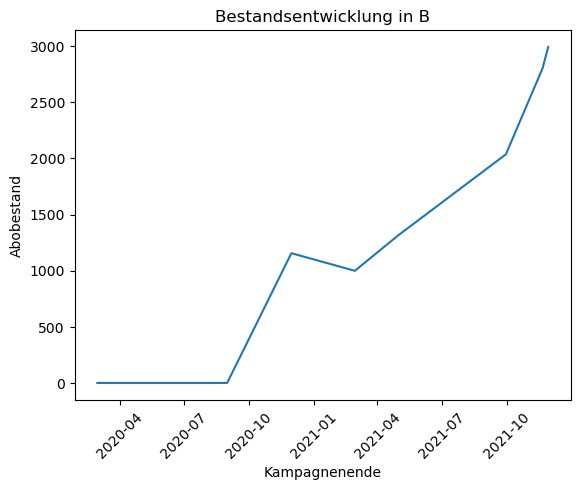

In [30]:
# Ein Liniendiagramm erstellen für Standort B um Bestandentwicklung zu visualisieren 
x = b_df['reference_day']
y = b_df['n_abos']

plt.plot(x, y)

plt.xlabel('Kampagnenende')
plt.ylabel('Abobestand')

plt.tick_params(axis='x', rotation=45)

plt.title('Bestandsentwicklung in B')



plt.show()

In [31]:
# Ergebnisse für Standort TH einem neuem Dataframe zuordnen
th_df = bestand_df[bestand_df["standort"] == 'TH']

In [32]:
th_df.head(9)

,reference_day,standort,n_abos
4,2020-02-29,TH,1862
9,2020-05-31,TH,3596
14,2020-08-31,TH,4664
19,2020-11-30,TH,4972
24,2021-02-28,TH,4427
29,2021-04-30,TH,5817
34,2021-09-30,TH,7298
39,2021-11-21,TH,8010
44,2021-11-29,TH,8532


Ergebnis: Am Ende der letzten Kampagne hat Standort TH einen Bestand von 8532 Abonnenten 

---


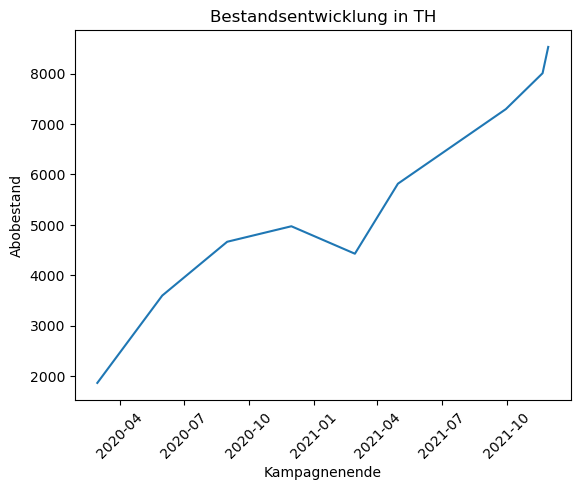

In [33]:
# Ein Liniendiagramm erstellen für Standort TH um Bestandsentwicklung zu visualisieren 
x = th_df['reference_day']
y = th_df['n_abos']

plt.plot(x, y)

plt.xlabel('Kampagnenende')
plt.ylabel('Abobestand')

plt.tick_params(axis='x', rotation=45)
plt.title('Bestandsentwicklung in TH')



plt.show()

In [34]:
# Ergebnisse für Standort NRW einem neuem Dataframe zuordnen
nrw_df = bestand_df[bestand_df["standort"] == 'NRW']

In [35]:
nrw_df.head(15)

,reference_day,standort,n_abos
1,2020-02-29,NRW,6231
6,2020-05-31,NRW,16649
11,2020-08-31,NRW,18474
16,2020-11-30,NRW,20110
21,2021-02-28,NRW,17547
26,2021-04-30,NRW,20215
31,2021-09-30,NRW,23760
36,2021-11-21,NRW,25442
41,2021-11-29,NRW,25404


Ergebnis: Am Ende der letzten Kampagne hat Standort NRW einen Bestand von 25404 Abonnenten 

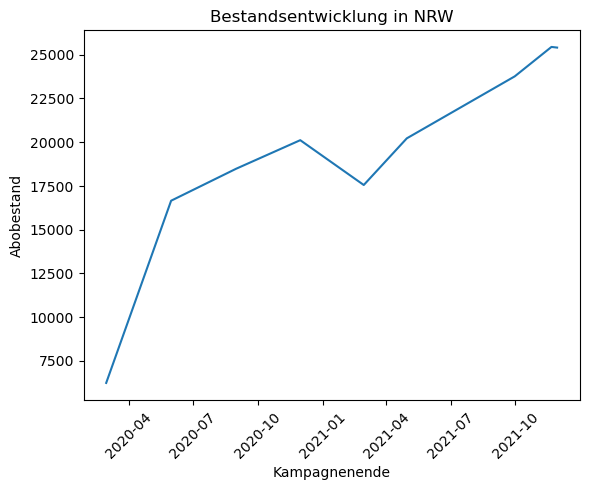

In [36]:
# Ein Liniendiagramm erstellen für Standort NRW um Bestandsentwicklung zu visualisieren 
x = nrw_df['reference_day']
y = nrw_df['n_abos']

plt.plot(x, y)

plt.xlabel('Kampagnenende')
plt.ylabel('Abobestand')

plt.tick_params(axis='x', rotation=45)

plt.title('Bestandsentwicklung in NRW')
plt.show()

---


In [37]:
# Ergebnisse für Standort BS einem neuem Dataframe zuordnen
bs_df = bestand_df[bestand_df["standort"] == 'BS']

In [38]:
bs_df.head(15)

,reference_day,standort,n_abos
3,2020-02-29,BS,0
8,2020-05-31,BS,864
13,2020-08-31,BS,1553
18,2020-11-30,BS,2272
23,2021-02-28,BS,1614
28,2021-04-30,BS,2163
33,2021-09-30,BS,3168
38,2021-11-21,BS,3417
43,2021-11-29,BS,3494


Ergebnis: Am Ende der letzten Kampagne hat Standort BS einen Bestand von 3494 Abonnenten 

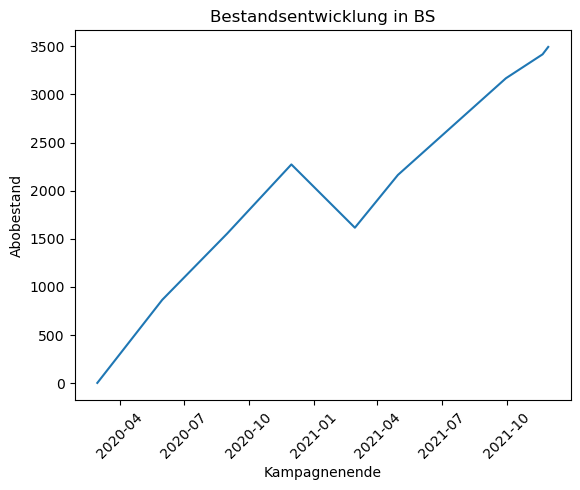

In [39]:
# Ein Liniendiagramm erstellen für Standort BS um Bestandsentwicklung zu visualisieren 
x = bs_df['reference_day']
y = bs_df['n_abos']

plt.plot(x, y)

plt.xlabel('Kampagnenende')
plt.ylabel('Abobestand')

plt.tick_params(axis='x', rotation=45)

plt.title('Bestandsentwicklung in BS')
plt.show()

In [40]:
# Ergebnisse für Standort HH einem neuem Dataframe zuordnen
hh_df = bestand_df[bestand_df["standort"] == 'HH']

In [41]:
hh_df.head(15)

,reference_day,standort,n_abos
2,2020-02-29,HH,4703
7,2020-05-31,HH,8900
12,2020-08-31,HH,9547
17,2020-11-30,HH,10065
22,2021-02-28,HH,9987
27,2021-04-30,HH,10276
32,2021-09-30,HH,11717
37,2021-11-21,HH,12366
42,2021-11-29,HH,12576


Ergebnis: Am Ende der letzten Kampagne hat Standort HH einen Bestand von 12576 Abonnenten 

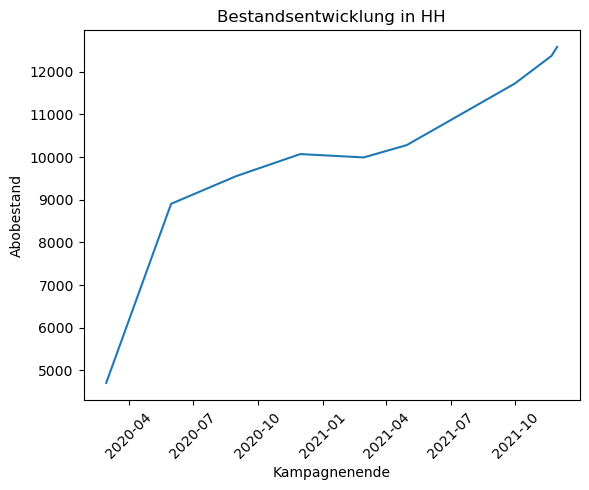

In [42]:
# Ein Liniendiagramm erstellen für Standort HH um Bestandsentwicklung zu visualisieren 
x = hh_df['reference_day']
y = hh_df['n_abos']

plt.plot(x, y)

plt.xlabel('Kampagnenende')
plt.ylabel('Abobestand')

plt.tick_params(axis='x', rotation=45)

plt.title('Bestandsentwicklung in HH')
plt.show()

---

## Aufgabe 2

### Wie viele Zugänge wurden in welcher Kampagne gewonnen? 

In [43]:
# Kopie des ersten Hauptdataframes erstellen
a2_df = piano_df.copy()

In [44]:
a2_df.head()

,verkaufsauftrag,start,ende,standort,portal,payment_provider,testabo,kampagne,haltbarkeit
0,1,2021-07-02,2022-01-01,B,BM,Paypal,FALSCH,Sommerkampagne_21,183
1,2,2020-06-02,2022-01-01,NRW,NRZ,Paypal,FALSCH,Sommerkampagne_20,578
2,3,2020-10-29,2020-11-29,HH,HA,Paypal,FALSCH,Herbstkampagne_20,31
3,4,2020-06-27,2020-09-27,NRW,WAZ,Paypal,FALSCH,Sommerkampagne_20,92
4,5,2020-06-30,2020-09-27,NRW,WAZ,Paypal,FALSCH,Sommerkampagne_20,89


In [45]:
# Die Zugänge pro Kampagne ermitteln 
a2_df = a2_df.groupby(['kampagne'])['start'].count().reset_index().rename(columns={'start': 'zugaenge'})


In [46]:
# die Daten nach der meisten Anzahl an Zugängen pro Kampagne ordnen
a2_df = a2_df.sort_values('zugaenge', ascending = False)
a2_df.head(9)


,kampagne,zugaenge
1,Frühlingskampagne_20,35542
6,Sommerkampagne_21,32750
5,Sommerkampagne_20,24870
3,Herbstkampagne_20,24094
4,Jahresstart_20,16506
2,Frühlingskampagne_21,12907
8,Winterkampagne_21,10487
7,Winterkampagne_20,9756
0,Cyber Week_21,2338


Ergebnis: Die Frühlingskampagne ist die Kampagne mit den meisten Zugängen 

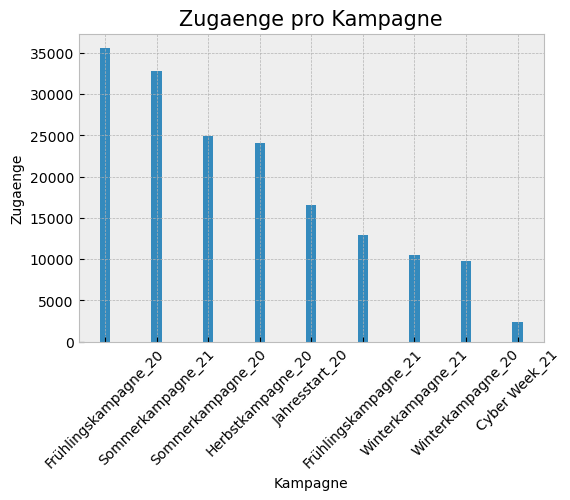

In [47]:
# Plotten der Daten 
plt.style.use('bmh') 

# Set figure size
plt.figure(figsize=(6, 4))

# Create vertical barplot for pH value per quality category
plt.bar(a2_df['kampagne'], a2_df['zugaenge'], width=0.2);

# Label axes
plt.xlabel("Kampagne", fontsize = 10)
plt.ylabel("Zugaenge", fontsize = 10)

plt.tick_params(axis='x', rotation=45)


# Set title
plt.title("Zugaenge pro Kampagne", fontsize = 15)


# Show graphic
plt.show()

### Wie hoch waren die Kosten pro Abonnement?

Ich habe die Daten, welche die Kosten der Kampagnen ausführen in  Google Sheets kopiert, die Anzahl der Zugaenge, die ich mit Python ermittelt habe hinzugefügt und die CPO sowie wie die Zugänge pro Tag pro Kampagne in Excel errechnet. Die Tabelle als Excel mit Formeln befindet sich im Ordner "Daten".

In [48]:
# Laden des Dataframes in dem ich den CPO ermittelt habe
cpo_df = pd.read_csv("data/cpo.csv", delimiter = ",")

In [49]:
cpo_df.head(15)

,kampagne,laufzeit_start,laufzeit_ende,laufzeit_in_tagen,zugaenge,zugaenge_pro_tag,werbesachkosten,provisionskosten_pro_abo,praemienkosten_pro_abo,cpo,kostengesamt
0,Jahresstart_20,2020-01-01,2020-02-29,60,16569,276.15,198000,1.50,0.50,13.95,231138.00
1,Frühlingskampagne_20,2020-03-01,2020-05-31,92,35599,386.95,420000,1.30,0.35,13.45,478738.35
2,Sommerkampagne_20,2020-06-01,2020-08-31,92,25015,271.90,302000,1.10,0.30,13.47,337021.00
3,Herbstkampagne_20,2020-09-01,2020-11-30,91,24333,267.40,290000,1.25,0.32,13.49,328202.81
4,Winterkampagne_20,2020-12-01,2021-02-28,90,9878,109.76,118000,1.40,0.40,13.75,135780.40
5,Frühlingskampagne_21,2021-03-01,2021-04-30,61,12936,212.07,152000,1.60,0.60,13.95,180459.20
6,Sommerkampagne_21,2021-05-01,2021-09-30,153,32976,215.53,390000,1.55,0.55,13.93,459249.60
7,Winterkampagne_21,2021-10-01,2021-11-21,52,10544,202.77,125000,1.10,0.34,13.30,140183.36
8,Cyber_Week_21,2021-11-22,2021-11-29,8,2362,295.25,40000,1.35,0.42,18.70,44180.74


Wie viel % der gewonnenen Abonnements waren nach 180 Tagen noch aktiv?

In [50]:
# Errechnen wie viel Tage das Aboabschluss zurück liegen muss 
start_date = datetime(2022, 1, 1)
delta = timedelta(days=180)
result_date = start_date - delta
print(result_date.strftime('%d.%m.%Y'))

05.07.2021


In [51]:
# Aussortierung der Daten, nicht mehr als 180 Tage vor dem Stichtag liegen 
haltbarkeit_df = piano_df[piano_df['start'] <= '2021-07-05']


In [52]:
# Gesamtzahl der hier relevanten Abonnements
haltbarkeit_df.shape

(140995, 9)

In [53]:
# Anzahl der Verträge mit einer Laufzeit von min. 180 Tagen
haltbarkeit2_df = haltbarkeit_df[haltbarkeit_df['haltbarkeit'] >= 180]
haltbarkeit2_df.shape

(48986, 9)

In [54]:
# Prozent der Verträge mit einer Laufzeit von min 180 Tagen = 34,75% 
print(48986 / 140995 * 100)

34.74307599560268


In [55]:
# Ermittlung der Anzahl an Abonnements die über 180 Tage liefen, je Standort 
haltbarkeit3_df  = haltbarkeit2_df.groupby('kampagne').count().reset_index()
haltbarkeit3_df.head(10)

,kampagne,verkaufsauftrag,start,ende,standort,portal,payment_provider,testabo,haltbarkeit
0,Frühlingskampagne_20,12156,12156,12156,12156,12156,12156,12156,12156
1,Frühlingskampagne_21,5136,5136,5136,5136,5136,5136,5136,5136
2,Herbstkampagne_20,8179,8179,8179,8179,8179,8179,8179,8179
3,Jahresstart_20,4329,4329,4329,4329,4329,4329,4329,4329
4,Sommerkampagne_20,7806,7806,7806,7806,7806,7806,7806,7806
5,Sommerkampagne_21,7469,7469,7469,7469,7469,7469,7469,7469
6,Winterkampagne_20,3911,3911,3911,3911,3911,3911,3911,3911


In [56]:
# Errechnen der Prozentzahl (Haltbarkeit 180 Tage) je Kampagne 
haltbarkeit3_df['haltbarkeit_pro'] = haltbarkeit3_df.apply(lambda row: row['haltbarkeit'] / 48986 * 100, axis =1 )

In [76]:
haltbarkeit3_df.head(12)

,kampagne,verkaufsauftrag,start,ende,standort,portal,payment_provider,testabo,haltbarkeit,haltbarkeit_pro
0,Frühlingskampagne_20,12156,12156,12156,12156,12156,12156,12156,12156,24.815253
1,Frühlingskampagne_21,5136,5136,5136,5136,5136,5136,5136,5136,10.484628
2,Herbstkampagne_20,8179,8179,8179,8179,8179,8179,8179,8179,16.696607
3,Jahresstart_20,4329,4329,4329,4329,4329,4329,4329,4329,8.837219
4,Sommerkampagne_20,7806,7806,7806,7806,7806,7806,7806,7806,15.935165
5,Sommerkampagne_21,7469,7469,7469,7469,7469,7469,7469,7469,15.247213
6,Winterkampagne_20,3911,3911,3911,3911,3911,3911,3911,3911,7.983914


-- Ergebnis: die Frühlingskampagne ist die Kampagnen, welche die größte Laufzeit erreicht hat 



---

# Aufgabe 3

In [58]:
 # Datei 'Preise' öffnen und Zeichenkodierungstyp erkennen
with open('data/preise.txt', 'rb') as datei:
    daten = datei.read()
    zeichenkodierung = chardet.detect(daten)['encoding']

# Datei 'Preise' als Pandas DataFrame öffnen
preise_df = pd.read_csv('data/preise.txt', delimiter= '\t', encoding=zeichenkodierung)

# Ausgabe des DataFrames
print(preise_df)

    Nr.              Kampagne Unnamed: 2   standort verkaufspreis_monat
0     1        Jahresstart_20        NaN          B             7,90 € 
1     1        Jahresstart_20        NaN         BS             6,90 € 
2     1        Jahresstart_20        NaN         HH             8,90 € 
3     1        Jahresstart_20        NaN        NRW             9,90 € 
4     1        Jahresstart_20        NaN         TH             5,90 € 
5     2  Frühlingskampagne_20        NaN          B             6,90 € 
6     2  Frühlingskampagne_20        NaN         BS             5,90 € 
7     2  Frühlingskampagne_20        NaN         HH             7,90 € 
8     2  Frühlingskampagne_20        NaN        NRW             8,90 € 
9     2  Frühlingskampagne_20        NaN         TH             4,90 € 
10    3     Sommerkampagne_20        NaN          B             6,29 € 
11    3     Sommerkampagne_20        NaN         BS             5,29 € 
12    3     Sommerkampagne_20        NaN         HH             

In [79]:
preise_df = preise_df.sort_values('verkaufspreis_monat',ascending= False)
preise_df.head(20)

,kampagne,standort,verkaufspreis_monat
3,Jahresstart_20,NRW,9.90
33,Sommerkampagne_21,NRW,9.90
23,Winterkampagne_20,NRW,9.90
2,Jahresstart_20,HH,8.90
32,Sommerkampagne_21,HH,8.90
8,Frühlingskampagne_20,NRW,8.90
22,Winterkampagne_20,HH,8.90
13,Sommerkampagne_20,NRW,8.29
38,Winterkampagne_21,NRW,8.29
18,Herbstkampagne_20,NRW,8.29


In [60]:
preise_df.shape

(45, 5)

In [61]:
preise_df['verkaufspreis_monat'] = preise_df['verkaufspreis_monat'].str.replace(',', '.').str.replace('€', '').astype(float)


In [62]:
preise_df = preise_df.drop(['Nr.', 'Unnamed: 2'], axis=1)


In [63]:
# make column names lowercase
preise_df.columns = preise_df.columns.str.lower()  

In [64]:
preise_df.head()

,kampagne,standort,verkaufspreis_monat
0,Jahresstart_20,B,7.9
1,Jahresstart_20,BS,6.9
2,Jahresstart_20,HH,8.9
3,Jahresstart_20,NRW,9.9
4,Jahresstart_20,TH,5.9


In [65]:
# "Hauptdataframe sowie den Dataframe für die Ermittlung der Kosten verbinden 
merged_df = pd.merge(piano_df, cpo_df, on='kampagne')


In [66]:
# Dataframe anpassen, nicht benötigte Spalten löschen 
merged_df = merged_df.drop(['laufzeit_start', 'laufzeit_ende', 'werbesachkosten', 'provisionskosten_pro_abo', 'praemienkosten_pro_abo' ], axis=1)


In [67]:
# den neuen Dataframe mit den Dataframe für Preise verbinden
merged2_df = pd.merge(merged_df, preise_df, on=['kampagne', 'standort'])


In [68]:
# Umrechnen der Haltbarkeit in Monate, und Aufrunden des Ergebnisses, da davon ausgegangen wird, dass für jeden angebrochenen Monat gezahlt wird 
merged2_df['anzahl_monate'] = merged2_df['haltbarkeit'] / 30
merged2_df['anzahl_monate'] = merged2_df['anzahl_monate'].apply(lambda x: ceil(x))

In [69]:
# Gewinn pro abgeschlossenes Abo ausrechnen
merged2_df['gewinn_pro_abo'] = merged2_df['verkaufspreis_monat'] * merged2_df['anzahl_monate'] - merged2_df['cpo']


In [70]:
merged2_df.head()

,verkaufsauftrag,start,ende,standort,portal,payment_provider,testabo,kampagne,haltbarkeit,laufzeit_in_tagen,zugaenge,zugaenge_pro_tag,cpo,kostengesamt,verkaufspreis_monat,anzahl_monate,gewinn_pro_abo
0,1,2021-07-02,2022-01-01,B,BM,Paypal,FALSCH,Sommerkampagne_21,183,153,32976,215.53,13.93,459249.6,7.9,7,41.37
1,499,2021-07-02,2022-01-01,B,BM,Paypal,FALSCH,Sommerkampagne_21,183,153,32976,215.53,13.93,459249.6,7.9,7,41.37
2,579,2021-05-12,2021-11-16,B,BM,Paypal,FALSCH,Sommerkampagne_21,188,153,32976,215.53,13.93,459249.6,7.9,7,41.37
3,660,2021-08-16,2022-01-01,B,BM,Paypal,FALSCH,Sommerkampagne_21,138,153,32976,215.53,13.93,459249.6,7.9,5,25.57
4,740,2021-07-02,2022-01-01,B,BM,Paypal,FALSCH,Sommerkampagne_21,183,153,32976,215.53,13.93,459249.6,7.9,7,41.37


In [71]:
# Neues Dataframe erstellen, dass den Gewinn pro Kampagne und Standort zeigt 
gewinn_df = merged2_df.groupby(['kampagne', 'standort'])['gewinn_pro_abo'].sum().reset_index()
gewinn_df = gewinn_df.sort_values('gewinn_pro_abo',ascending= False)
gewinn_df.head(20)


,kampagne,standort,gewinn_pro_abo
10,Sommerkampagne_20,NRW,567884.97
3,Herbstkampagne_20,NRW,473220.46
15,Sommerkampagne_21,NRW,402736.02
6,Jahresstart_20,NRW,344352.15
5,Jahresstart_20,HH,264081.75
20,Winterkampagne_20,NRW,227367.80
14,Sommerkampagne_21,HH,177528.20
9,Sommerkampagne_20,HH,164174.64
2,Herbstkampagne_20,HH,132480.96
19,Winterkampagne_20,HH,124140.50


In [72]:
# Gewinn pro Kampagne zusammengefasst anzeigen 
gewinn_kampagne_df = merged2_df.groupby(['kampagne'])['gewinn_pro_abo'].sum().reset_index()
gewinn_kampagne_df = gewinn_kampagne_df.sort_values('gewinn_pro_abo',ascending= False)
gewinn_kampagne_df.head(20)

,kampagne,gewinn_pro_abo
2,Sommerkampagne_20,810997.36
0,Herbstkampagne_20,725104.14
3,Sommerkampagne_21,714520.90
1,Jahresstart_20,676496.10
4,Winterkampagne_20,402656.40
5,Winterkampagne_21,23959.05


In [73]:
gewinn_portal_df = merged2_df.groupby(['portal', 'standort', 'cpo'])['gewinn_pro_abo'].sum().reset_index()
gewinn_portal_df = gewinn_portal_df.sort_values('gewinn_pro_abo',ascending= False)
gewinn_portal_df.head(20)

,portal,standort,cpo,gewinn_pro_abo
45,WAZ,NRW,13.47,350576.01
46,WAZ,NRW,13.49,301720.47
14,HA,HH,13.95,264081.75
48,WAZ,NRW,13.93,246640.15
49,WAZ,NRW,13.95,200747.70
13,HA,HH,13.93,177528.20
10,HA,HH,13.47,164174.64
47,WAZ,NRW,13.75,147802.60
51,WP,NRW,13.47,140983.49
11,HA,HH,13.49,132480.96
